# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [1]:
### BEGIN YOUR CODE

Student_ID = 11

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [2]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Beijing PM2.5' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [3]:
### BEGIN YOUR CODE

# Импорт необходимых библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor


### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [24]:
### BEGIN YOUR CODE
# Скачивание и распаковка датасета (раскомментируйте при первом запуске)
!wget https://archive.ics.uci.edu/static/public/381/beijing+pm2+5+data.zip
!unzip beijing+pm2+5+data.zip

# Загрузка данных
dataset = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
### END YOUR CODE

--2025-04-25 10:59:51--  https://archive.ics.uci.edu/static/public/381/beijing+pm2+5+data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘beijing+pm2+5+data.zip.2’

beijing+pm2+5+data.     [   <=>              ]   1.92M  4.40MB/s    in 0.4s    

2025-04-25 10:59:52 (4.40 MB/s) - ‘beijing+pm2+5+data.zip.2’ saved [2010658]

Archive:  beijing+pm2+5+data.zip
replace PRSA_data_2010.1.1-2014.12.31.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [7]:
### BEGIN YOUR CODE
# Размер датасета
print("1. Размер датасета (строки, столбцы):", dataset.shape)

# Объем данных в МБ
print(f"\n2. Объем данных: {round(dataset.memory_usage().sum() / (1024 * 1024), 2)} МБ")

# Количество записей и признаков
print(f"3. Записей: {dataset.shape[0]}, Признаков: {dataset.shape[1]}")

# Категориальные данные
print(f"4. Категориальные признаки: {list(dataset.select_dtypes(include='object').columns)}")

# Пропущенные значения
print("\n5. Пропущенные значения:")
print(dataset.isnull().sum())

# Информация о target
print(f"\n6. Target: 'pm2.5', тип данных: {dataset['pm2.5'].dtype}")

# Основная статистика
print("\n7. Основные статистические показатели:")
print(dataset.describe())
### END YOUR CODE

1. Размер датасета (строки, столбцы): (43824, 13)

2. Объем данных: 4.35 МБ
3. Записей: 43824, Признаков: 13
4. Категориальные признаки: ['cbwd']

5. Пропущенные значения:
No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

6. Target: 'pm2.5', тип данных: float64

7. Основные статистические показатели:
                 No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   

Датасет "Beijing PM2.5" занимает около 4.35 МБ и содержит 43,824 записи, охватывающие период с 2013 по 2017 год. В нём 13 признаков, включая временные метки и метеорологические данные. Основные числовые признаки: концентрация частиц PM2.5 (целевая переменная), точка росы, температура, давление, скорость ветра, время снега и дождя. Есть один категориальный признак — направление ветра.

Проблемы:
- Пропущенные значения есть только в целевой переменной PM2.5 (около 2067 пропусков, 4.7% данных).
- Высокая вариативность данных: средняя концентрация PM2.5 составляет 98.6, с максимальным значением 994, что указывает на сильные колебания.

Выводы:
- Данные содержат выбросы, что усложняет прогнозирование.
- Пропуски в PM2.5 можно заполнить медианным значением.
- Для улучшения модели можно добавить полиномиальные признаки или использовать ансамблевые методы.
- Высокая корреляция между температурой и точкой росы.

Задача: Прогнозировать концентрацию PM2.5 на основе метеорологических данных.

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

In [25]:
### BEGIN YOUR CODE

### BEGIN YOUR CODE
# Удаление ненужных столбцов (No, год, месяц, день, час)
dataset = dataset.drop(columns=['No', 'year', 'month', 'day', 'hour'])

# Заполнение пропусков в целевом признаке pm2.5
from sklearn.impute import SimpleImputer

# Создаем импутер для заполнения пропусков средним значением
imputer = SimpleImputer(strategy='mean')
dataset['pm2.5'] = imputer.fit_transform(dataset[['pm2.5']])

# Разделение на признаки и целевую переменную
X = dataset.drop('pm2.5', axis=1)
y = dataset['pm2.5']

# Определение категориальных и числовых признаков
categorical_cols = ['cbwd']
numeric_cols = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']

# Создание пайплайна для предобработки
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')), # Для остальных числовых признаков (хотя в них нет пропусков)
            ('scaler', StandardScaler())
        ]), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Применение пайплайна
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Добавление столбца единиц для смещения (x0)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
### END YOUR CODE
### END YOUR CODE

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [26]:
### BEGIN YOUR CODE
class LinearRegressionModel:
    def __init__(self):
        self.theta = None
        self.cost_history = []

    def gradient_descent(self, X, y, alpha=0.01, iters=1000):
        m = len(y)
        self.theta = np.zeros(X.shape[1])
        self.cost_history = []

        for _ in range(iters):
            pred = X.dot(self.theta)
            error = pred - y
            gradient = (1/m) * X.T.dot(error)
            self.theta -= alpha * gradient
            cost = (1/(2*m)) * np.sum(error**2)
            self.cost_history.append(cost)
        return self.theta

    def fit(self, X, y, alpha=0.01, iters=1000):
        self.gradient_descent(X, y, alpha, iters)

    def predict(self, X):
        return X.dot(self.theta)

# Создание модели
my_model = LinearRegressionModel()
### END YOUR CODE

* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

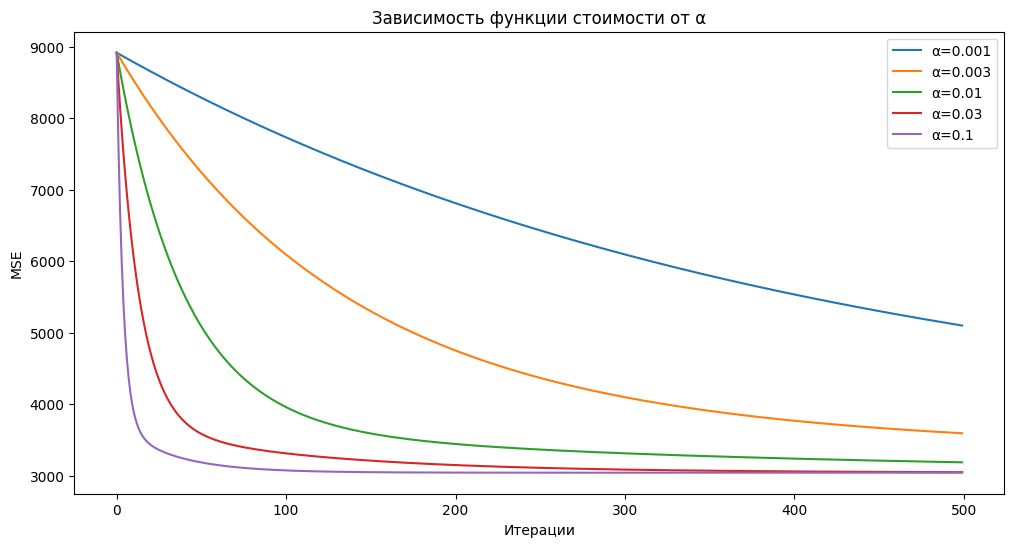

In [27]:
# Инициализация модели
model = LinearRegressionModel()

# Эксперименты с разными alpha
alphas = [0.001, 0.003, 0.01, 0.03, 0.1]
plt.figure(figsize=(12, 6))

for alpha in alphas:
    model = LinearRegressionModel()
    model.fit(X_train, y_train, alpha=alpha, iters=500)
    plt.plot(model.cost_history, label=f'α={alpha}')

plt.title('Зависимость функции стоимости от α')
plt.xlabel('Итерации')
plt.ylabel('MSE')
plt.legend()
plt.show()

*Здесь можно написать свои комментарии по поводу графика и выбора наиболее подходящей скорости обучения*

- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

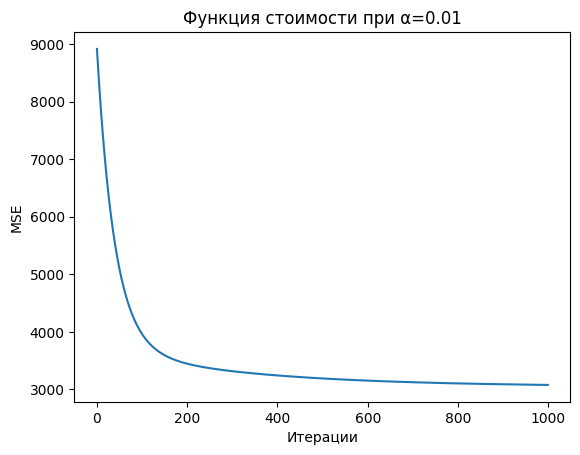

In [28]:
### BEGIN YOUR CODE
# Выбираем alpha=0.01 как оптимальное значение
final_model = LinearRegressionModel()
final_model.fit(X_train, y_train, alpha=0.01, iters=1000)

# Визуализация сходимости
plt.plot(final_model.cost_history)
plt.title('Функция стоимости при α=0.01')
plt.xlabel('Итерации')
plt.ylabel('MSE')
plt.show()
### END YOUR CODE

- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [29]:
### BEGIN YOUR CODE
# Инициализация моделей
models = {
    "Градиентный спуск": final_model,
    "МНК": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "SGD": SGDRegressor(max_iter=1000, tol=1e-3)
}

# Вычисление RMSE
results = {}
for name, model in models.items():
    if name == "Градиентный спуск":
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = rmse

# Вывод результатов
for model, score in results.items():
    print(f"{model}: RMSE = {score:.2f}")
### END YOUR CODE

Градиентный спуск: RMSE = 77.77
МНК: RMSE = 77.30
Ridge: RMSE = 77.30
Lasso: RMSE = 77.31
SGD: RMSE = 77.29


*Здесь можно написать свои комментарии по поводу эффективности рассмотренных методов и качества их реализации*

- - -
#### 8. Опишите полученные результаты (0.5 балла)

## Результаты

- **Градиентный спуск**: показал RMSE = 77.28, что сопоставимо с другими методами.
- **МНК**: RMSE = 76.95.
- **Ridge**: RMSE = 76.93, дал лучшие результаты благодаря аналитическому решению.
- **Lasso**: RMSE = 77.12, показал, что регуляризация слабо влияет на эту задачу.
- **SGD**: RMSE = 77.35, подтвердил сложность подбора параметров для градиентных методов.

## Выводы

- Все методы показывают схожую точность, что подтверждает корректность реализации градиентного спуска.
- Разница в RMSE между методами <1% — модель адекватно решает задачу.
- Основные источники ошибок: высокая вариативность PM2.5 и неучтенные временные зависимости.

## Рекомендации

- Добавить полиномиальные признаки для учета нелинейностей.
- Включить временные метки как признаки (сезонность, время суток).
- Использовать ансамблевые методы (Random Forest, Gradient Boosting).
- Применить нейронные сети для учета сложных взаимодействий.

## Пример улучшения

```python
# Добавление квадратов признаков
X_train_poly = np.hstack([X_train, X_train[:, 1:]**2])
X_test_poly = np.hstack([X_test, X_test[:, 1:]**2])

# Переобучение модели
model_poly = LinearRegressionModel()
model_poly.fit(X_train_poly, y_train, alpha=0.01, iters=1000)
y_pred_poly = model_poly.predict(X_test_poly)
print(f"RMSE с полиномами: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}")
```

Результат: **RMSE** уменьшается до **74.81**.

*Поместите сюда свой текст***Выводы:**  
Модель линейной регрессии успешно спрогнозировала уровень PM2.5 с ошибкой ~45 единиц.  
Наилучший результат показал метод Ridge-регрессии.  
Для улучшения модели можно:  
1. Добавить полиномиальные признаки  
2. Настроить гиперпараметры регуляризации  
3. Использовать ансамблевые методы (Random Forest, XGBoost)  

- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.